# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Function

In [2]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [3]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train) 
    
    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    # Show confusion_matrix classification_report accuracy_score
    print(f'\n accuracy_score = {accuracy_score(y_test,y_predict)* 100:.2f}% \n')
    print(f'confusion_matrix = \n {confusion_matrix(y_test,y_predict)}\n')
    print(f'classification_report = \n {classification_report(y_test,y_predict)}')

    # Heatmap of the confusion matrix
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_predict)
    
    # Fake --> class 0 , Real --> class 1
    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=['Iris-setosa', 'Iris-versicolor' ,'Iris-virginica']
, yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    
    # Labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
        

# Exploratory Data Analysis (EDA)

# Read data

In [4]:
file_path = '/kaggle/input/iriscsv/Iris.csv'

data = pd.read_csv(file_path)

In [5]:
data.shape

(150, 6)

In [6]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.50,43.45,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.84,0.83,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.05,0.43,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.76,1.76,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.20,0.76,0.1,0.30,1.30,1.80,2.5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Check duplicated data




In [9]:
data.duplicated().sum()


0

# Check Null value

In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.drop('Id',axis = 1,inplace = True)

# Nunique values in each column

In [12]:
for column in data.columns:

    print(f'{column}: {data[column].nunique()}')

SepalLengthCm: 35
SepalWidthCm: 23
PetalLengthCm: 43
PetalWidthCm: 22
Species: 3


In [13]:
data['Species'].value_counts().reset_index()

,Species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


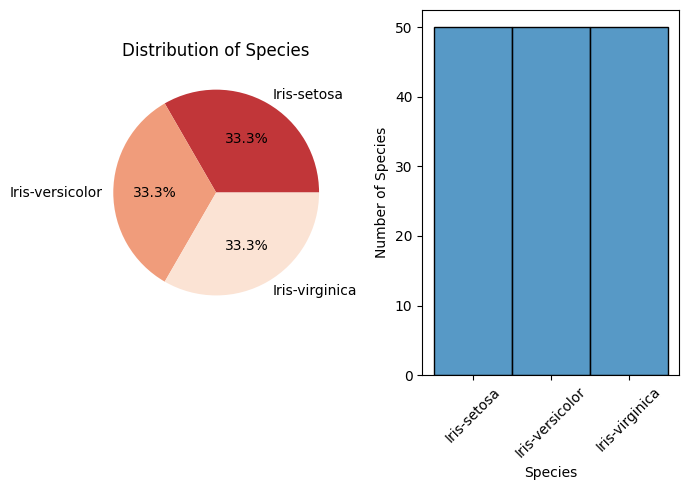

In [14]:
Vsualize('Species',data)

In [15]:
le =LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

print(le.classes_) #to print clasess in order oo transfor to 0 1 2

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [16]:
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,5.9,3.2,4.8,1.8,1
81,5.5,2.4,3.7,1.0,1
145,6.7,3.0,5.2,2.3,2
109,7.2,3.6,6.1,2.5,2
2,4.7,3.2,1.3,0.2,0
16,5.4,3.9,1.3,0.4,0
17,5.1,3.5,1.4,0.3,0
89,5.5,2.5,4.0,1.3,1
82,5.8,2.7,3.9,1.2,1
46,5.1,3.8,1.6,0.2,0


In [17]:
correlation = data.corr()

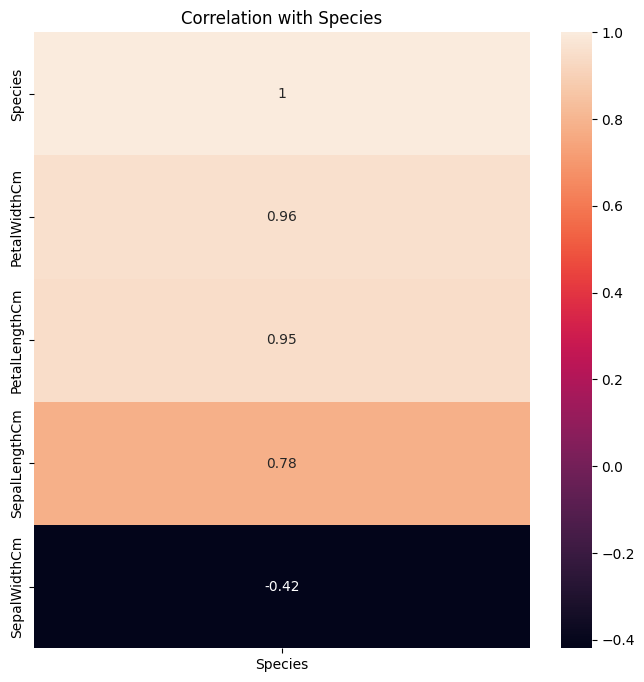

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation[['Species']].sort_values(by='Species', ascending=False), annot=True)
plt.title("Correlation with Species")
plt.show()

# Split data

In [19]:
x = data.drop('Species', axis=1)

y = data['Species']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

# Train & Test data


 accuracy_score = 96.67% 

confusion_matrix = 
 [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]

classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



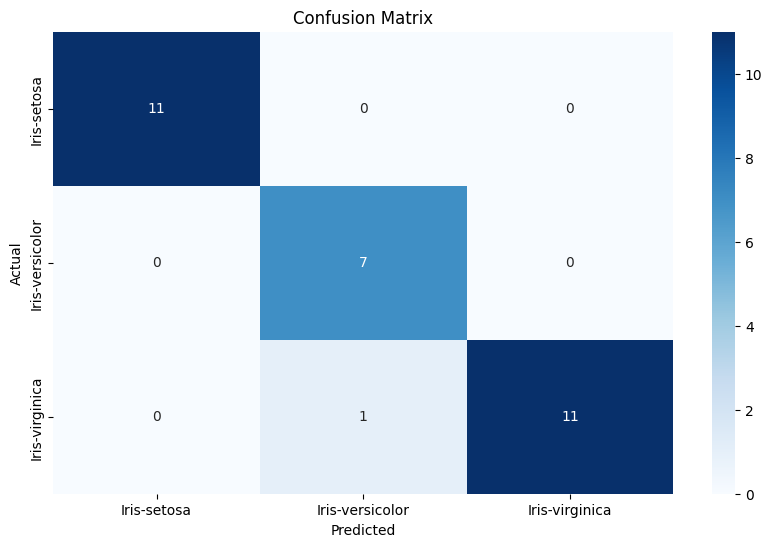

In [21]:
# LogisticRegression model
train_test_model(LogisticRegression(),x_train,x_test,y_train,y_test)


 accuracy_score = 96.67% 

confusion_matrix = 
 [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]

classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



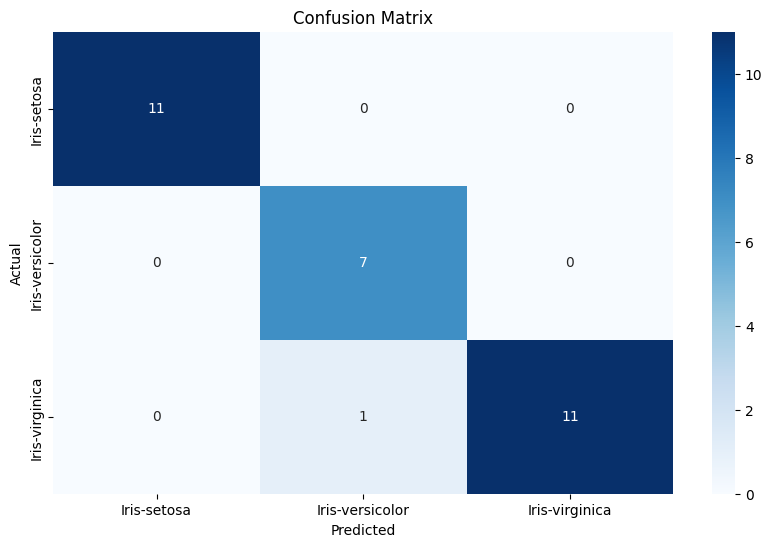

In [22]:
# DecisionTreeClassifier model
train_test_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)